                                                                                            Submitted by : Vivek Raju.

Used following documentation for reference.

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://seaborn.pydata.org/generated/seaborn.regplot.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

## Imports

In [92]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import scipy

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

## Setting figure size for plots

In [93]:
%matplotlib inline
rcParams['figure.figsize'] = 4,4
sb.set_style('whitegrid')

## Loading dataset

In [94]:
#Load Iris dataset
fileURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
iris = pd.read_csv(fileURL, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"], header=None)

iris = iris.dropna()
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features

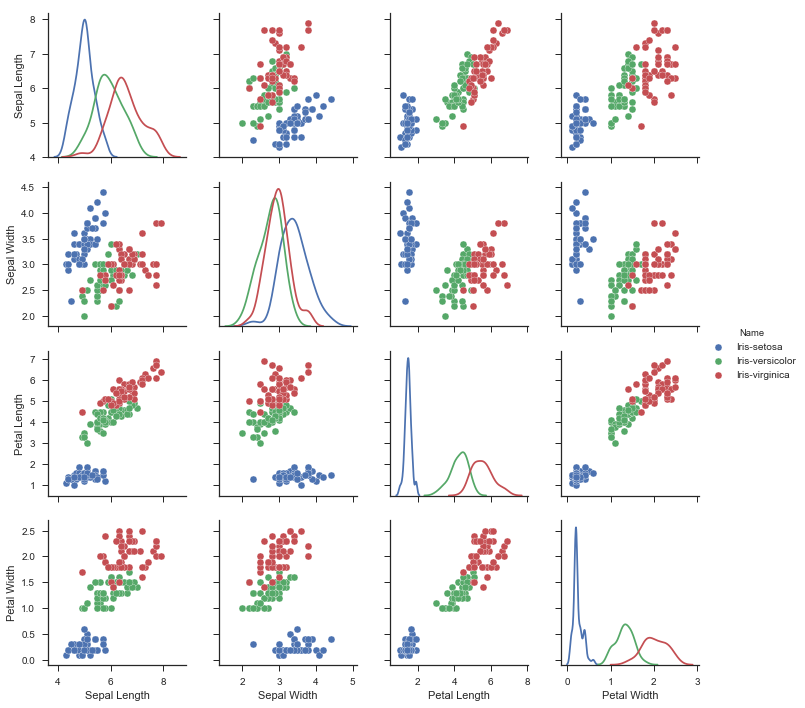

In [95]:
sb.set(style="ticks", color_codes=True)
sb.pairplot(iris, hue="Name", diag_kind='kde')

In [96]:
print(iris.corr())

              Sepal Length  Sepal Width  Petal Length  Petal Width
Sepal Length      1.000000    -0.109369      0.871754     0.817954
Sepal Width      -0.109369     1.000000     -0.420516    -0.356544
Petal Length      0.871754    -0.420516      1.000000     0.962757
Petal Width       0.817954    -0.356544      0.962757     1.000000


## A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

In [97]:
print(iris.shape[1])
iris.iloc[:,1:2]
list(iris.iloc[:,1:2])[0]

5


'Sepal Width'

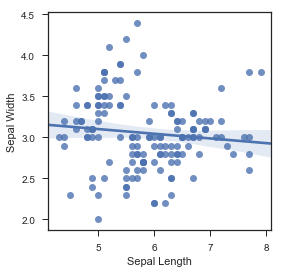

Score :  -0.02993794314899967
Mean Squared Error :  0.14194456375767478
Coefficients :  [[-0.07272373]]


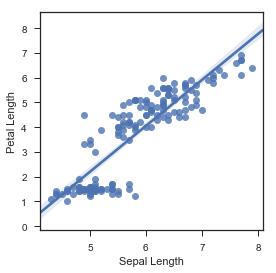

Score :  0.7745595999116273
Mean Squared Error :  0.8159459322672193
Coefficients :  [[1.86154923]]


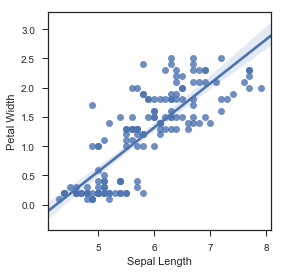

Score :  0.6523946392841697
Mean Squared Error :  0.20771827542111
Coefficients :  [[0.7670472]]


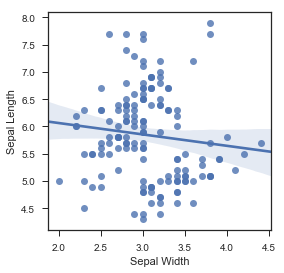

Score :  -0.011438699564324084
Mean Squared Error :  0.7787307500101308
Coefficients :  [[-0.26252031]]


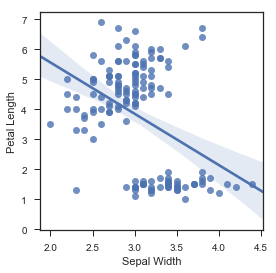

Score :  0.10793853131886544
Mean Squared Error :  2.732012380367999
Coefficients :  [[-1.81203164]]


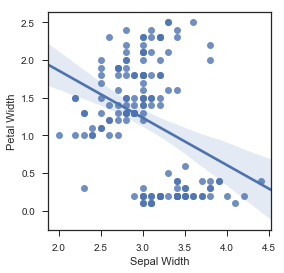

Score :  0.12489796600121128
Mean Squared Error :  0.6034083055484167
Coefficients :  [[-0.58559691]]


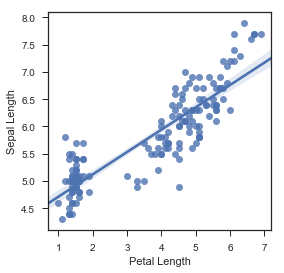

Score :  0.7398820901791086
Mean Squared Error :  0.13070024283216486
Coefficients :  [[0.41398981]]


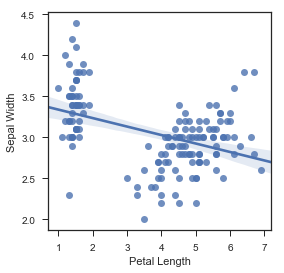

Score :  -0.028384423123758884
Mean Squared Error :  0.1955425976849657
Coefficients :  [[-0.11927035]]


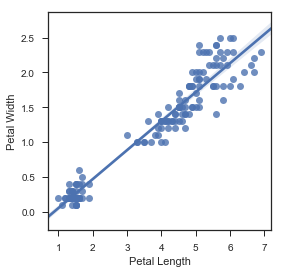

Score :  0.9442137663465366
Mean Squared Error :  0.02715754211152254
Coefficients :  [[0.41597875]]


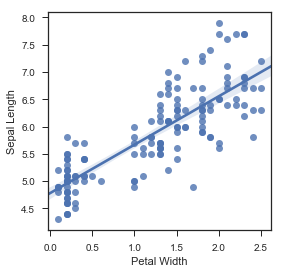

Score :  0.5900520392642494
Mean Squared Error :  0.32267787546555005
Coefficients :  [[0.88103192]]


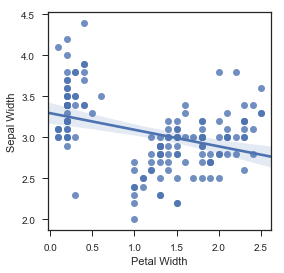

Score :  0.13051854813168529
Mean Squared Error :  0.15444134182112465
Coefficients :  [[-0.19619815]]


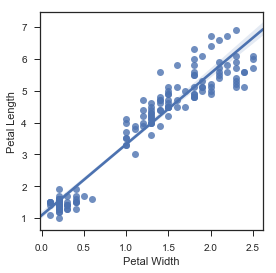

Score :  0.9182480295519422
Mean Squared Error :  0.2657776940644035
Coefficients :  [[2.27861114]]


In [98]:
#Loop twice through range 0 to 4 to generate regression of every pair of features.
for i in range(0,4):
    data = iris.iloc[:,i:i+1] 
    for j in range (0,4):
        if (i!=j):
            #Regression plot for pairwise combination of features.
            sb.regplot(x = list(iris.iloc[:,i:i+1])[0], y = list(iris.iloc[:,j:j+1])[0], data=iris)           
            plt.show()
            
            #Generate Training and Testing sets.
            target = iris.iloc[:,j:j+1]
            X_train, X_test, y_train, y_test = train_test_split(data, target)
            
            #Linear Regression Model.
            LinReg = sklearn.linear_model.LinearRegression()
            LinReg.fit(X_train, y_train)
            preds = LinReg.predict(X_test)
            mean_sq_err = sklearn.metrics.mean_squared_error(y_test, preds)            
            print ('Score : ', LinReg.score(X_test, y_test))            
            print ('Mean Squared Error : ', mean_sq_err)
            print ('Coefficients : ', LinReg.coef_)

## The plot of the best of the set of linear regression models generated in the last step

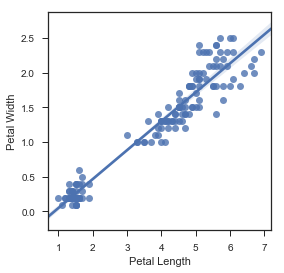

Score :  0.9295190342982199
Mean Squared Error :  0.04903796164907508
Coefficients :  [[0.41042414]]


In [99]:
iris_data = iris[['Petal Length']]
iris_target = iris[['Petal Width']]

sb.regplot(x = 'Petal Length', y = 'Petal Width', data=iris)           
plt.show()

x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target)

LinReg = sklearn.linear_model.LinearRegression()
LinReg.fit(x_train, y_train)
preds = LinReg.predict(x_test)
mean_sq_err = sklearn.metrics.mean_squared_error(y_test, preds)            
print ('Score : ', LinReg.score(x_test, y_test))            
print ('Mean Squared Error : ', mean_sq_err)
print ('Coefficients : ', LinReg.coef_)

### Based upon the linear models you generated, which pair of features appear to be most predictive for one another?

Based upon the linear models generated, the pair of features that appear to be most predictive for one another is Petal Width and Petal Length. It has a score of 93% which describes how good the fit is and also has the lowest mean squared error of 4%.

### Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

The feature that I was best able to detect based upon other features was Petal Width. Now on removing this feature and then generating a classification model, the performace of the classification model wouldn't be significatnly impacted by the removal of the feature because of it being easily predictable using the other 3 features namely Sepal Length, Sepal Width and Petal Length.